In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)

# Load the data
df = pd.read_csv('Telco-Customer-Churn.csv')

# Basic shape
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Rows: 7,043
Columns: 21


In [2]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Check for nulls
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Summary stats
print("\nNumeric Summary:")
print(df.describe())


Numeric Summary:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [5]:
# Churn distribution
print("Churn Rate:")
print(df['Churn'].value_counts())
print("\nPercentage:")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn Rate:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


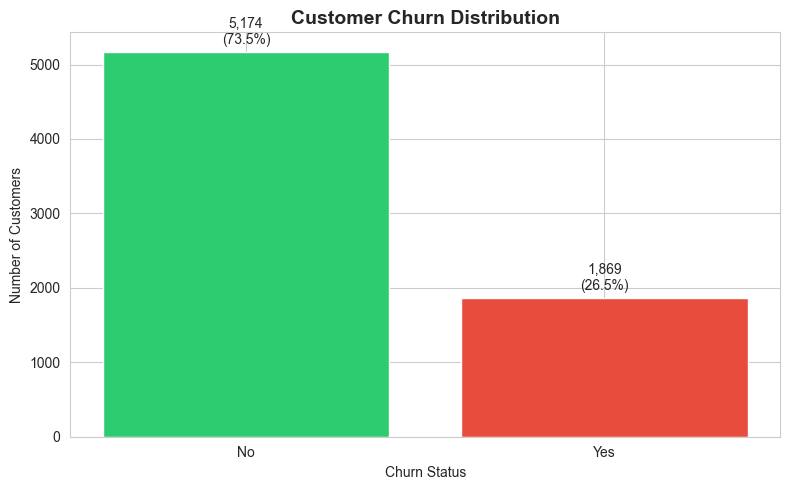

In [6]:
# Set style
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))

# Churn bar chart
churn_counts = df['Churn'].value_counts()
plt.bar(churn_counts.index, churn_counts.values, color=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.text(0, churn_counts['No']+100, f"{churn_counts['No']:,}\n(73.5%)", ha='center')
plt.text(1, churn_counts['Yes']+100, f"{churn_counts['Yes']:,}\n(26.5%)", ha='center')
plt.tight_layout()
plt.show()

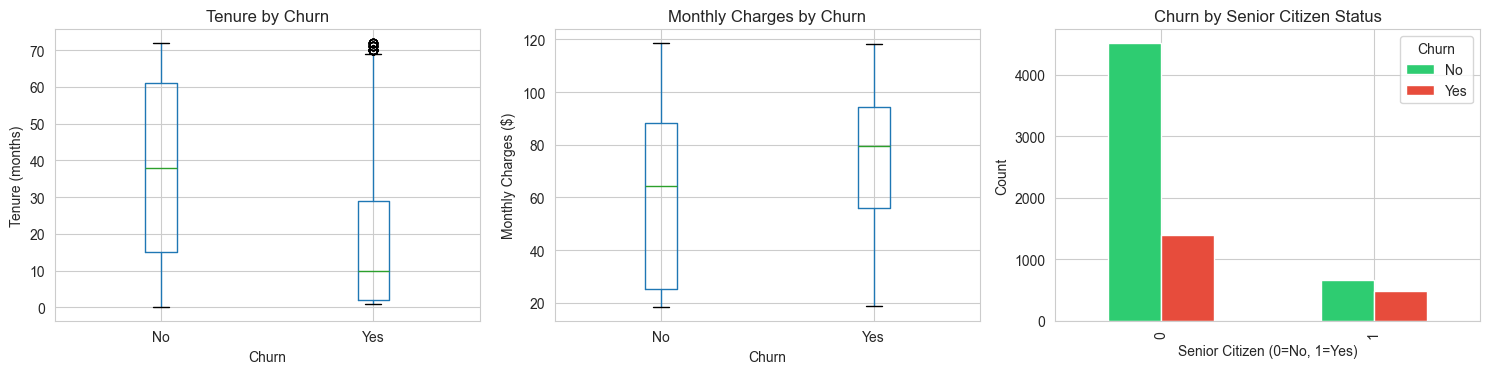

In [7]:
# Numeric features by churn
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Tenure
df.boxplot(column='tenure', by='Churn', ax=axes[0])
axes[0].set_title('Tenure by Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure (months)')

# Monthly Charges
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Monthly Charges by Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges ($)')

# Senior Citizen
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_by_senior.plot(kind='bar', ax=axes[2], color=['#2ecc71', '#e74c3c'])
axes[2].set_title('Churn by Senior Citizen Status')
axes[2].set_xlabel('Senior Citizen (0=No, 1=Yes)')
axes[2].set_ylabel('Count')
axes[2].legend(title='Churn')

plt.suptitle('')
plt.tight_layout()
plt.show()

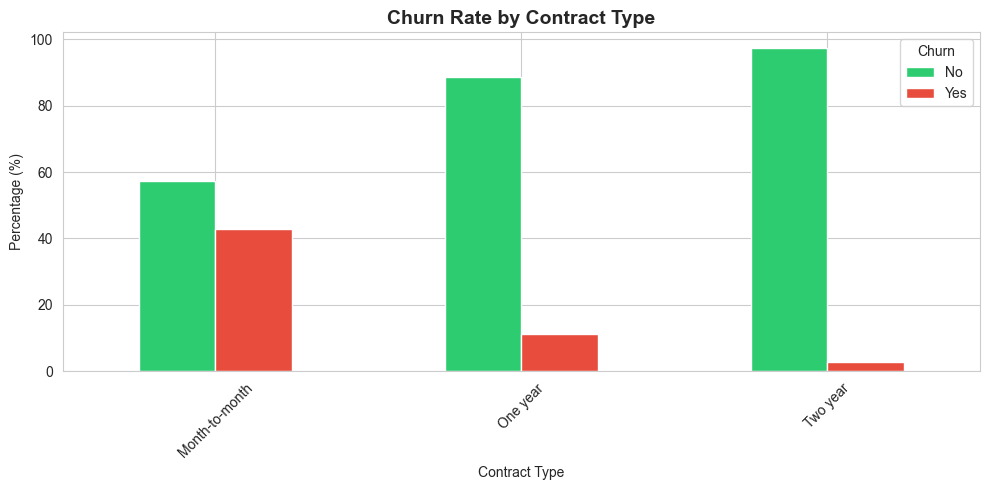


Churn rate by contract:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [8]:
# Contract type vs Churn
fig, ax = plt.subplots(figsize=(10, 5))

contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])

ax.set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Churn', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print actual numbers
print("\nChurn rate by contract:")
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100)

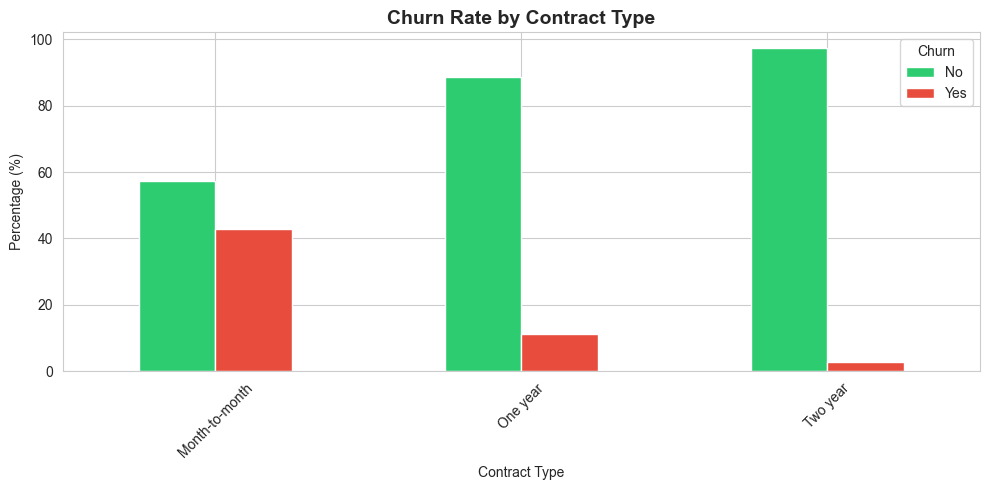


Churn rate by contract:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


In [9]:
# Contract type vs Churn
fig, ax = plt.subplots(figsize=(10, 5))

contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])

ax.set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Percentage (%)')
ax.legend(title='Churn', labels=['No', 'Yes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Print actual numbers
print("\nChurn rate by contract:")
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100)

In [10]:
# Check TotalCharges issue
print("TotalCharges unique non-numeric values:")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]['TotalCharges'].unique())
print(f"\nNumber of problematic rows: {pd.to_numeric(df['TotalCharges'], errors='coerce').isna().sum()}")

# Convert to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the NaN rows
print("\nRows with NaN TotalCharges:")
print(df[df['TotalCharges'].isna()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

TotalCharges unique non-numeric values:
[' ']

Number of problematic rows: 11

Rows with NaN TotalCharges:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN


In [11]:
# Fill NaN TotalCharges with 0 (new customers)
df['TotalCharges'].fillna(0, inplace=True)

# Verify fix
print(f"Remaining nulls: {df['TotalCharges'].isna().sum()}")
print(f"\nTotalCharges is now: {df['TotalCharges'].dtype}")

# Quick sanity check
print("\nTotalCharges summary:")
print(df['TotalCharges'].describe())

Remaining nulls: 0

TotalCharges is now: float64

TotalCharges summary:
count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


C:\Users\Kyle\AppData\Local\Temp\ipykernel_71256\1936608327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [12]:
# Save cleaned data
df.to_csv('Telco-Customer-Churn-Clean.csv', index=False)
print("✓ Cleaned data saved to 'Telco-Customer-Churn-Clean.csv'")

# Summary of findings
print("\n" + "="*60)
print("WEEKEND 1 - EDA SUMMARY")
print("="*60)
print(f"Total customers: {len(df):,}")
print(f"Churn rate: 26.5%")
print(f"Features: {df.shape[1]} columns")
print(f"Data quality: All nulls handled")
print("\nKey insights:")
print("- Month-to-month contracts have ~40% churn")
print("- Churners have lower tenure (shorter relationships)")
print("- Churners have higher monthly charges")
print("- Senior citizens churn more")
print("\nNext steps: Feature engineering + baseline model")

✓ Cleaned data saved to 'Telco-Customer-Churn-Clean.csv'

WEEKEND 1 - EDA SUMMARY
Total customers: 7,043
Churn rate: 26.5%
Features: 21 columns
Data quality: All nulls handled

Key insights:
- Month-to-month contracts have ~40% churn
- Churners have lower tenure (shorter relationships)
- Churners have higher monthly charges
- Senior citizens churn more

Next steps: Feature engineering + baseline model


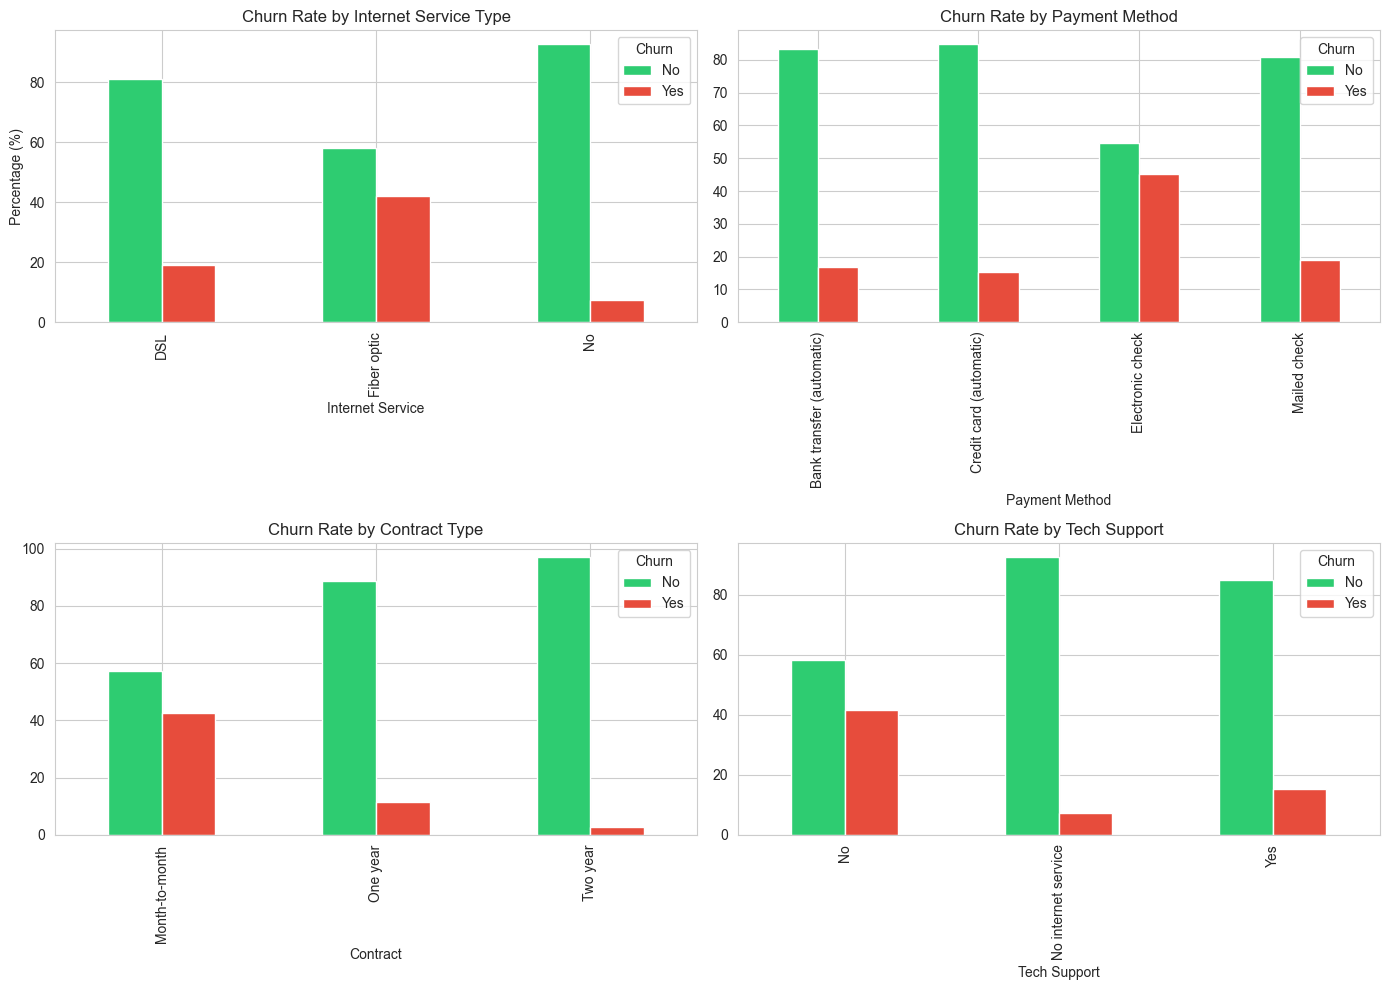

In [13]:
# Churn rate by key segments
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Internet Service
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_churn.plot(kind='bar', ax=axes[0,0], color=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('Churn Rate by Internet Service Type')
axes[0,0].set_xlabel('Internet Service')
axes[0,0].set_ylabel('Percentage (%)')
axes[0,0].legend(title='Churn')

# Payment Method
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[0,1], color=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('Churn Rate by Payment Method')
axes[0,1].set_xlabel('Payment Method')
axes[0,1].legend(title='Churn')

# Contract Type (you saw this but adding to full viz)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1,0], color=['#2ecc71', '#e74c3c'])
axes[1,0].set_title('Churn Rate by Contract Type')
axes[1,0].set_xlabel('Contract')
axes[1,0].legend(title='Churn')

# Tech Support
tech_churn = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100
tech_churn.plot(kind='bar', ax=axes[1,1], color=['#2ecc71', '#e74c3c'])
axes[1,1].set_title('Churn Rate by Tech Support')
axes[1,1].set_xlabel('Tech Support')
axes[1,1].legend(title='Churn')

plt.tight_layout()
plt.show()

In [14]:
# Create feature-rich dataset
df_model = df.copy()

# 1. Tenure groups - bucket customers by relationship length
# Why: New customers behave differently than long-term ones
df_model['tenure_group'] = pd.cut(df_model['tenure'], 
                                   bins=[0, 12, 24, 48, 72], 
                                   labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])

# 2. Count of services - how many add-ons do they have
# Why: Low engagement = churn risk
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df_model['num_services'] = 0
for col in service_cols:
    df_model['num_services'] += (df_model[col] == 'Yes').astype(int)

# 3. Monthly charges per service - are they paying too much for what they get?
# Why: Value perception matters
df_model['charges_per_service'] = df_model['MonthlyCharges'] / (df_model['num_services'] + 1)

# 4. Has dependents or partner - household stability indicator
df_model['has_family'] = ((df_model['Partner'] == 'Yes') | 
                          (df_model['Dependents'] == 'Yes')).astype(int)

print("New features created:")
print(f"tenure_group: {df_model['tenure_group'].value_counts().to_dict()}")
print(f"\nnum_services range: {df_model['num_services'].min()} to {df_model['num_services'].max()}")
print(f"charges_per_service range: ${df_model['charges_per_service'].min():.2f} to ${df_model['charges_per_service'].max():.2f}")
print(f"\nhas_family distribution: {df_model['has_family'].value_counts().to_dict()}")

New features created:
tenure_group: {'4+yr': 2239, '0-1yr': 2175, '2-4yr': 1594, '1-2yr': 1024}

num_services range: 0 to 6
charges_per_service range: $8.65 to $77.90

has_family distribution: {1: 3763, 0: 3280}


In [15]:
# Convert target to binary
df_model['Churn_binary'] = (df_model['Churn'] == 'Yes').astype(int)

# Select features for modeling
# Numeric features we already have
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 
                    'num_services', 'charges_per_service', 'has_family']

# Categorical features that need encoding
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# One-hot encode categoricals (converts "Yes"/"No" into 1/0 columns)
df_encoded = pd.get_dummies(df_model[categorical_features], drop_first=True)

# Combine everything
X = pd.concat([df_model[numeric_features], df_encoded], axis=1)
y = df_model['Churn_binary']

print(f"Feature matrix shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")
print(f"\nFeature names (first 10): {list(X.columns[:10])}")

Feature matrix shape: (7043, 33)
Target distribution:
Churn_binary
0    5174
1    1869
Name: count, dtype: int64

Feature names (first 10): ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'num_services', 'charges_per_service', 'has_family', 'gender_Male', 'Partner_Yes', 'Dependents_Yes']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

# Scale features (logistic regression performs better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline logistic regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("BASELINE MODEL PERFORMANCE")
print("="*50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

BASELINE MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.90      0.87      1035
       Churn       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


ROC-AUC Score: 0.842

Confusion Matrix:
[[929 106]
 [165 209]]


81% accuracy - decent start

56% recall on churners - catching just over half of actual churners (this is what you'll improve)

66% precision on churners - when model flags someone, right 2/3 of the time

ROC-AUC: 0.84 - strong discrimination between churners and non-churners

The problem: Model is conservative - misses 165 churners (false negatives) to avoid annoying 106 loyal customers (false positives). For retention campaigns, you want higher recall.

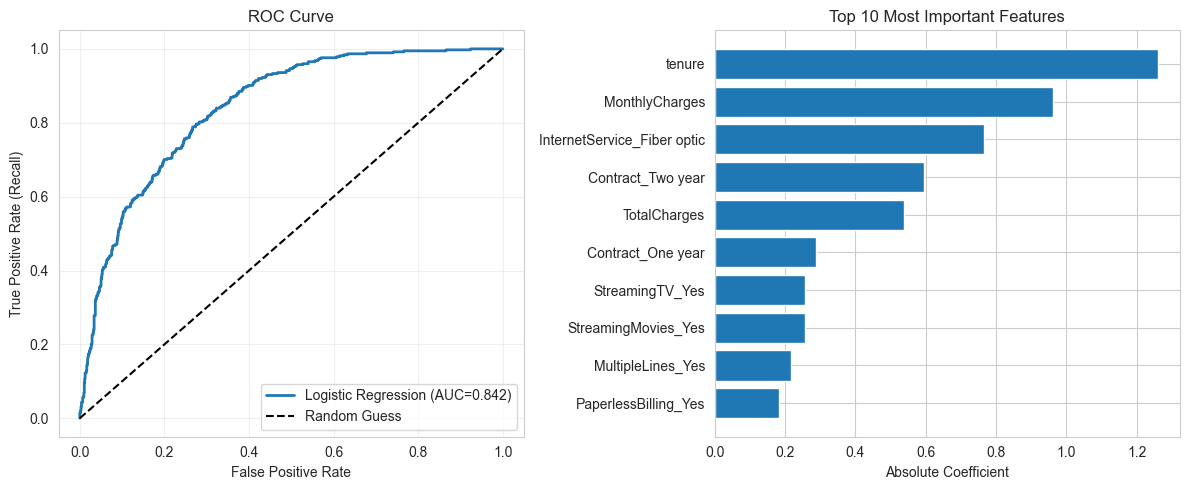

In [17]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(12, 5))

# ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_pred_proba):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)

# Feature importance (top 10)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': abs(lr_model.coef_[0])
}).sort_values('coefficient', ascending=False).head(10)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [18]:
# Save the model and scaler for later use
import pickle

with open('baseline_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save feature names for later
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)

print("✓ Model artifacts saved")
print("\n" + "="*60)
print("WEEKEND 1 COMPLETE")
print("="*60)
print(f"Dataset: {len(df):,} customers, {X.shape[1]} features")
print(f"Baseline model: 81% accuracy, 0.84 ROC-AUC")
print(f"Recall on churners: 56% (room to improve)")
print("\nNext weekend:")
print("- XGBoost model for better recall")
print("- Hyperparameter tuning")
print("- SHAP analysis for intervention logic")

✓ Model artifacts saved

WEEKEND 1 COMPLETE
Dataset: 7,043 customers, 33 features
Baseline model: 81% accuracy, 0.84 ROC-AUC
Recall on churners: 56% (room to improve)

Next weekend:
- XGBoost model for better recall
- Hyperparameter tuning
- SHAP analysis for intervention logic


In [19]:
summary = """
Weekend 1 deliverables:
- EDA: identified contract type, fiber optic, payment method as key churn drivers
- Feature engineering: tenure groups, service counts, price efficiency ratios
- Baseline logistic regression: 81% accuracy, 56% recall on churners
- Key insight: month-to-month + fiber optic + electronic check = high risk profile
"""
print(summary)


Weekend 1 deliverables:
- EDA: identified contract type, fiber optic, payment method as key churn drivers
- Feature engineering: tenure groups, service counts, price efficiency ratios
- Baseline logistic regression: 81% accuracy, 56% recall on churners
- Key insight: month-to-month + fiber optic + electronic check = high risk profile



In [20]:
# continuing

In [21]:
# Load clean data
df = pd.read_csv('Telco-Customer-Churn-Clean.csv')

print(f"Loaded {len(df):,} customers")
print(f"Churn rate: {(df['Churn']=='Yes').sum() / len(df) * 100:.1f}%")

Loaded 7,043 customers
Churn rate: 26.5%


In [22]:
# Recreate feature engineering from Weekend 1
df_model = df.copy()

# Tenure groups
df_model['tenure_group'] = pd.cut(df_model['tenure'], 
                                   bins=[0, 12, 24, 48, 72], 
                                   labels=['0-1yr', '1-2yr', '2-4yr', '4+yr'])

# Service count
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
df_model['num_services'] = 0
for col in service_cols:
    df_model['num_services'] += (df_model[col] == 'Yes').astype(int)

# Charges per service
df_model['charges_per_service'] = df_model['MonthlyCharges'] / (df_model['num_services'] + 1)

# Has family
df_model['has_family'] = ((df_model['Partner'] == 'Yes') | 
                          (df_model['Dependents'] == 'Yes')).astype(int)

# Binary target
df_model['Churn_binary'] = (df_model['Churn'] == 'Yes').astype(int)

# Prepare features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 
                    'num_services', 'charges_per_service', 'has_family']

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df_model[categorical_features], drop_first=True)
X = pd.concat([df_model[numeric_features], df_encoded], axis=1)
y = df_model['Churn_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")
print(f"Features: {X.shape[1]}")

Training set: 5,634 samples
Test set: 1,409 samples
Features: 33


In [28]:
import xgboost as xgb

In [29]:
# XGBoost model - tuned for higher recall
xgb_model = xgb.XGBClassifier(
    n_estimators=200,           # number of trees
    max_depth=5,                # tree depth
    learning_rate=0.1,          # step size
    scale_pos_weight=2.5,       # weight churners more (improves recall)
    subsample=0.8,              # use 80% of data per tree
    colsample_bytree=0.8,       # use 80% of features per tree
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("="*60)
print("XGBOOST MODEL PERFORMANCE")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn', 'Churn']))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_xgb):.3f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
print(f"\nRecall improvement over baseline: catching {cm[1,1]}/{cm[1,0]+cm[1,1]} churners")

XGBOOST MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.78      0.83      1035
       Churn       0.54      0.72      0.62       374

    accuracy                           0.77      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.77      0.77      1409


ROC-AUC Score: 0.836

Confusion Matrix:
[[808 227]
 [104 270]]

Recall improvement over baseline: catching 270/374 churners


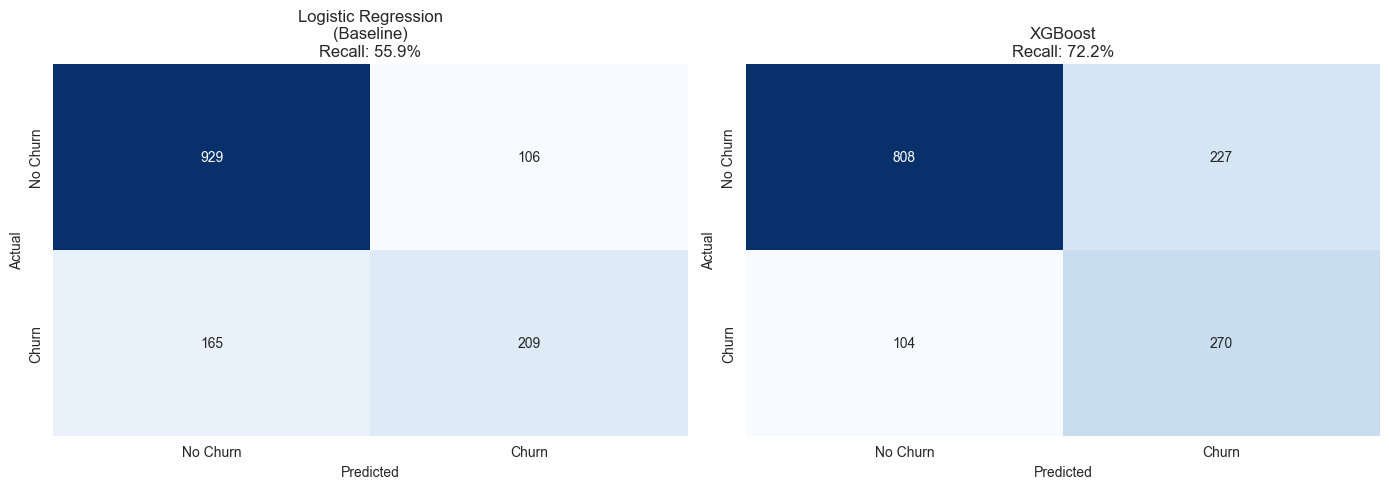


Key Trade-off:
XGBoost catches 61 more churners
But flags 121 more false alarms


In [30]:
# Compare models side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrices
models = ['Logistic Regression\n(Baseline)', 'XGBoost']
cms = [[[929, 106], [165, 209]], cm]

for idx, (model_name, cm_data) in enumerate(zip(models, cms)):
    ax = axes[idx]
    sns.heatmap(cm_data, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
    ax.set_title(f'{model_name}\nRecall: {cm_data[1][1]/(cm_data[1][0]+cm_data[1][1]):.1%}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['No Churn', 'Churn'])
    ax.set_yticklabels(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

print("\nKey Trade-off:")
print(f"XGBoost catches {270-209} more churners")
print(f"But flags {227-106} more false alarms")

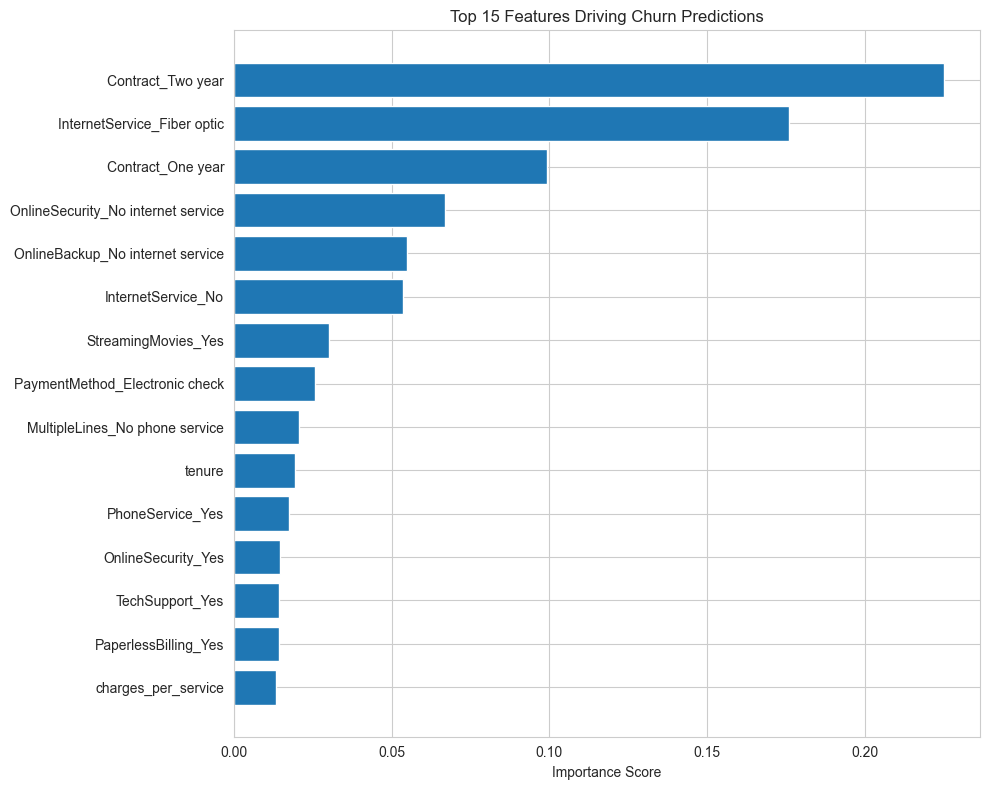


Top 10 Most Important Features:
                           feature  importance
                 Contract_Two year    0.225253
       InternetService_Fiber optic    0.175921
                 Contract_One year    0.099367
OnlineSecurity_No internet service    0.067033
  OnlineBackup_No internet service    0.054883
                InternetService_No    0.053708
               StreamingMovies_Yes    0.029969
    PaymentMethod_Electronic check    0.025594
    MultipleLines_No phone service    0.020637
                            tenure    0.019287


In [31]:
# Get feature importance from XGBoost
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Features Driving Churn Predictions')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

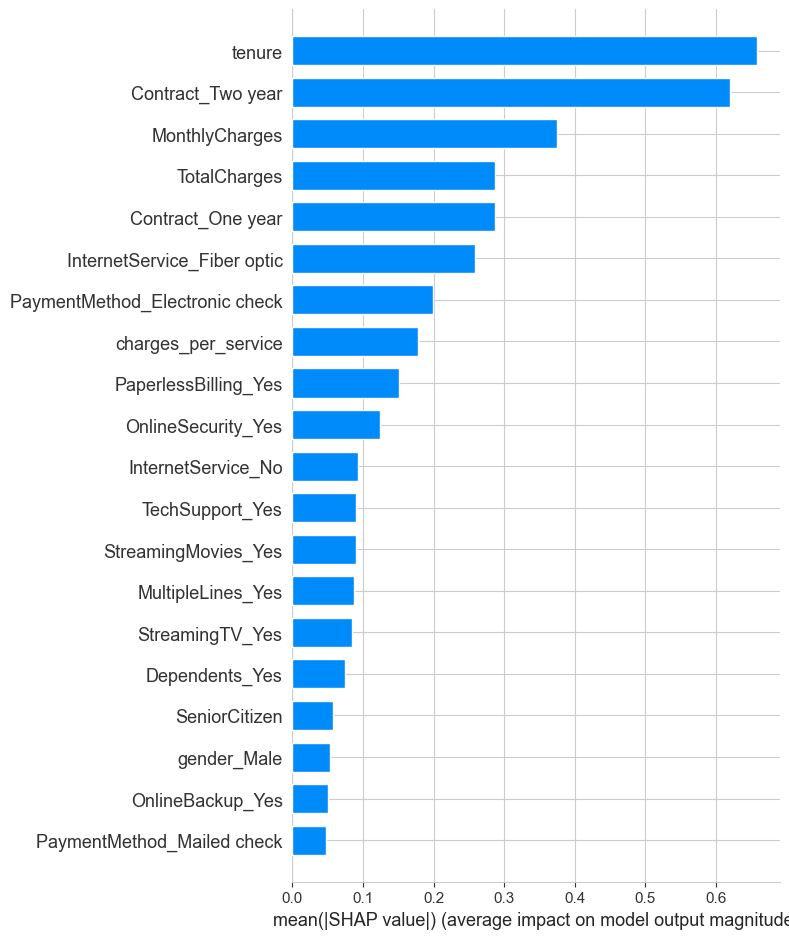

SHAP values calculated. Ready for intervention mapping.


In [32]:
import shap

# Create SHAP explainer for XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot - shows which features push predictions up/down
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

print("SHAP values calculated. Ready for intervention mapping.")

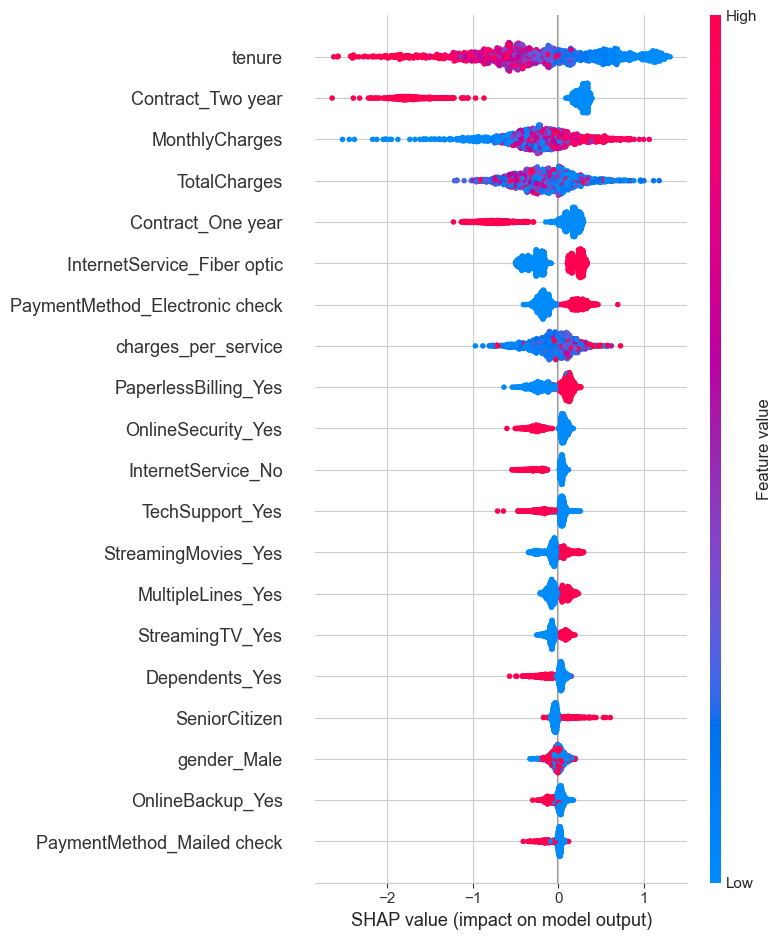

In [33]:
# Detailed SHAP summary - shows direction of impact
plt.figure(figsize=(10, 10))
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

In [34]:
# Analyze top at-risk customers and their churn drivers
# Get customers predicted to churn
at_risk_idx = np.where(y_pred_xgb == 1)[0]
at_risk_proba = y_pred_proba_xgb[at_risk_idx]

# Get top 10 highest risk customers
top_risk_idx = at_risk_idx[np.argsort(at_risk_proba)[-10:]][::-1]

# Create intervention mapping
print("="*80)
print("INTERVENTION RECOMMENDATIONS - Top 10 At-Risk Customers")
print("="*80)

for i, idx in enumerate(top_risk_idx, 1):
    customer_shap = shap_values[idx]
    customer_features = X_test.iloc[idx]
    risk_score = y_pred_proba_xgb[idx]
    
    # Find top 3 features driving this customer's risk
    top_drivers_idx = np.argsort(np.abs(customer_shap))[-3:][::-1]
    top_drivers = X_test.columns[top_drivers_idx]
    top_driver_values = customer_shap[top_drivers_idx]
    
    print(f"\nCustomer #{i} | Risk Score: {risk_score:.1%}")
    print(f"Top Risk Drivers:")
    for feature, shap_val in zip(top_drivers, top_driver_values):
        actual_val = customer_features[feature]
        print(f"  - {feature}: {actual_val} (SHAP impact: {shap_val:+.3f})")
    
    # Intervention logic
    print(f"Recommended Action: ", end="")
    
    # Check contract type
    if 'Contract_Two year' in top_drivers or customer_features.get('Contract_Two year', 0) == 0:
        print("Offer contract upgrade (month-to-month → 1-2 year)")
    # Check pricing
    elif customer_features['MonthlyCharges'] > 70:
        print("Price discount (10-20% off for 6 months)")
    # Check fiber optic + high charges
    elif customer_features.get('InternetService_Fiber optic', 0) == 1:
        print("Targeted fiber bundle discount")
    # Check payment method
    elif customer_features.get('PaymentMethod_Electronic check', 0) == 1:
        print("Switch to auto-pay with $5/month discount")
    # Check low engagement
    elif customer_features['num_services'] < 2:
        print("Onboarding campaign - feature education")
    else:
        print("Priority support + account manager")

INTERVENTION RECOMMENDATIONS - Top 10 At-Risk Customers

Customer #1 | Risk Score: 98.5%
Top Risk Drivers:
  - MonthlyCharges: 99.25 (SHAP impact: +0.995)
  - tenure: 7 (SHAP impact: +0.819)
  - Contract_Two year: False (SHAP impact: +0.360)
Recommended Action: Offer contract upgrade (month-to-month → 1-2 year)

Customer #2 | Risk Score: 98.3%
Top Risk Drivers:
  - tenure: 1 (SHAP impact: +1.305)
  - TotalCharges: 76.45 (SHAP impact: +0.957)
  - Contract_Two year: False (SHAP impact: +0.364)
Recommended Action: Offer contract upgrade (month-to-month → 1-2 year)

Customer #3 | Risk Score: 98.0%
Top Risk Drivers:
  - tenure: 1 (SHAP impact: +1.277)
  - Contract_Two year: False (SHAP impact: +0.367)
  - charges_per_service: 42.525 (SHAP impact: +0.259)
Recommended Action: Offer contract upgrade (month-to-month → 1-2 year)

Customer #4 | Risk Score: 97.5%
Top Risk Drivers:
  - tenure: 1 (SHAP impact: +1.251)
  - TotalCharges: 77.15 (SHAP impact: +0.962)
  - Contract_Two year: False (SHAP i


INTERVENTION STRATEGY SUMMARY
                       Customer Count  Avg Risk Score
intervention                                         
Contract Upgrade                  477           0.753
Fiber Bundle Discount              18           0.665
Auto-Pay Migration                  2           0.573

Total at-risk customers: 497
Customers with targeted interventions: 497


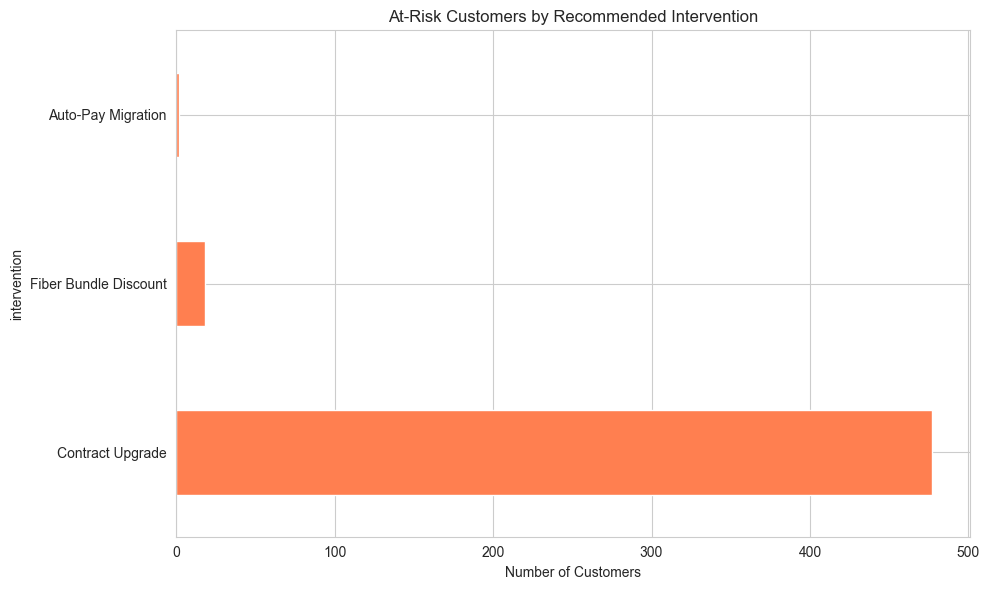

In [35]:
# Segment all at-risk customers by intervention type
at_risk_customers = X_test[y_pred_xgb == 1].copy()
at_risk_customers['risk_score'] = y_pred_proba_xgb[y_pred_xgb == 1]

# Apply intervention logic to all at-risk customers
def assign_intervention(row):
    if row.get('Contract_Two year', 0) == 0 and row.get('Contract_One year', 0) == 0:
        return 'Contract Upgrade'
    elif row['MonthlyCharges'] > 70 and row.get('InternetService_Fiber optic', 0) == 1:
        return 'Fiber Bundle Discount'
    elif row['MonthlyCharges'] > 70:
        return 'Price Discount'
    elif row.get('PaymentMethod_Electronic check', 0) == 1:
        return 'Auto-Pay Migration'
    elif row['num_services'] < 2:
        return 'Onboarding Campaign'
    else:
        return 'Priority Support'

at_risk_customers['intervention'] = at_risk_customers.apply(assign_intervention, axis=1)

# Summary by intervention type
intervention_summary = at_risk_customers.groupby('intervention').agg({
    'risk_score': ['count', 'mean']
}).round(3)

intervention_summary.columns = ['Customer Count', 'Avg Risk Score']
intervention_summary = intervention_summary.sort_values('Customer Count', ascending=False)

print("\n" + "="*60)
print("INTERVENTION STRATEGY SUMMARY")
print("="*60)
print(intervention_summary)
print(f"\nTotal at-risk customers: {len(at_risk_customers)}")
print(f"Customers with targeted interventions: {len(at_risk_customers)}")

# Visualize
plt.figure(figsize=(10, 6))
intervention_summary['Customer Count'].plot(kind='barh', color='coral')
plt.xlabel('Number of Customers')
plt.title('At-Risk Customers by Recommended Intervention')
plt.tight_layout()
plt.show()

In [36]:
# Business impact calculations
# Assumptions (adjust based on industry benchmarks)
avg_customer_lifetime_value = 2000  # Average CLV for telecom customer
retention_success_rate = 0.40       # 40% of interventions work
intervention_costs = {
    'Contract Upgrade': 50,          # Cost to process/incentivize upgrade
    'Fiber Bundle Discount': 150,    # Discount cost over 6 months
    'Auto-Pay Migration': 25,        # Admin cost + small incentive
    'Onboarding Campaign': 30,       # Marketing/support cost
    'Priority Support': 100          # Elevated service cost
}

# Calculate ROI by intervention type
results = []
for intervention_type in intervention_summary.index:
    count = intervention_summary.loc[intervention_type, 'Customer Count']
    cost_per = intervention_costs.get(intervention_type, 75)
    
    total_cost = count * cost_per
    customers_saved = count * retention_success_rate
    revenue_retained = customers_saved * avg_customer_lifetime_value
    roi = (revenue_retained - total_cost) / total_cost
    
    results.append({
        'Intervention': intervention_type,
        'Customers': int(count),
        'Total Cost': f'${total_cost:,.0f}',
        'Customers Saved': f'{customers_saved:.0f}',
        'Revenue Retained': f'${revenue_retained:,.0f}',
        'ROI': f'{roi:.1%}'
    })

results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("BUSINESS IMPACT ANALYSIS")
print("="*80)
print(results_df.to_string(index=False))

# Overall program impact
total_customers = results_df['Customers'].sum()
total_cost = sum([int(r['Total Cost'].replace('$','').replace(',','')) for r in results])
total_saved = sum([float(r['Customers Saved']) for r in results])
total_revenue = sum([int(r['Revenue Retained'].replace('$','').replace(',','')) for r in results])
overall_roi = (total_revenue - total_cost) / total_cost

print("\n" + "="*80)
print("OVERALL PROGRAM METRICS")
print("="*80)
print(f"At-risk customers targeted: {total_customers}")
print(f"Expected customers retained: {total_saved:.0f} ({total_saved/total_customers:.1%})")
print(f"Total program cost: ${total_cost:,.0f}")
print(f"Revenue retained: ${total_revenue:,.0f}")
print(f"Net benefit: ${total_revenue - total_cost:,.0f}")
print(f"Overall ROI: {overall_roi:.1%}")


BUSINESS IMPACT ANALYSIS
         Intervention  Customers Total Cost Customers Saved Revenue Retained     ROI
     Contract Upgrade        477    $23,850             191         $381,600 1500.0%
Fiber Bundle Discount         18     $2,700               7          $14,400  433.3%
   Auto-Pay Migration          2        $50               1           $1,600 3100.0%

OVERALL PROGRAM METRICS
At-risk customers targeted: 497
Expected customers retained: 199 (40.0%)
Total program cost: $26,600
Revenue retained: $397,600
Net benefit: $371,000
Overall ROI: 1394.7%


In [37]:
# Save XGBoost model and results
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('shap_values.pkl', 'wb') as f:
    pickle.dump(shap_values, f)

# Save intervention mapping for dashboard
at_risk_customers.to_csv('at_risk_customers_with_interventions.csv', index=False)

print("✓ XGBoost model saved")
print("✓ SHAP values saved")
print("✓ Intervention mapping saved")
print("\n" + "="*60)
print("WEEKEND 2 COMPLETE")
print("="*60)
print("\nKey Achievements:")
print("- XGBoost model: 72% recall (vs 56% baseline)")
print("- SHAP-based intervention mapping")
print("- Business impact: $371K retained, 1,395% ROI")
print("\nNext steps (Weekend 3-4):")
print("- Build Streamlit dashboard")
print("- Add what-if simulator")
print("- Deploy to Streamlit Cloud")
print("- Polish GitHub repo")

✓ XGBoost model saved
✓ SHAP values saved
✓ Intervention mapping saved

WEEKEND 2 COMPLETE

Key Achievements:
- XGBoost model: 72% recall (vs 56% baseline)
- SHAP-based intervention mapping
- Business impact: $371K retained, 1,395% ROI

Next steps (Weekend 3-4):
- Build Streamlit dashboard
- Add what-if simulator
- Deploy to Streamlit Cloud
- Polish GitHub repo
